In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
# import warnings
# warnings.filterwarnings('ignore')

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-v0_8-whitegrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    
# tqdm
from tqdm.notebook import tqdm

In [3]:
path = 'c:/reposit/data/dacon/2023 전력사용량 예측 AI 경진대회/'

## 1. 데이터 확인하기

In [6]:
# train
df_tr = pd.read_csv(path + 'train.csv')
df_tr.shape

(204000, 10)

In [7]:
df_tr.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88


In [8]:
# test
df_te = pd.read_csv(path + 'test.csv')
df_te.shape

(16800, 7)

In [9]:
df_te.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75


In [10]:
df_bd = pd.read_csv(path + 'building_info.csv')
df_bd.shape

(100, 7)

In [11]:
df_bd.head(3)

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.0,-,-,-
1,2,건물기타,122233.47,99000.0,-,-,-
2,3,건물기타,171243.00,113950.0,40,-,-


## 2. 데이터 톺아보기

### 2.1 test

In [57]:
df_te.shape

(16800, 7)

In [56]:
df_te.isnull().sum().to_frame('nan_cnt')

,nan_cnt
num_date_time,0
건물번호,0
일시,0
기온(C),0
강수량(mm),0
풍속(m/s),0
습도(%),0


In [61]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [62]:
df_te.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%)
count,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000
mean,50.500000,21.975232,0.266720,1.783405,77.148036
std,28.866929,2.884010,1.130288,1.041896,16.080725
min,1.000000,12.200000,0.000000,0.000000,26.000000
25%,25.750000,19.900000,0.000000,1.000000,66.750000
50%,50.500000,21.700000,0.000000,1.700000,79.000000
75%,75.250000,23.600000,0.000000,2.500000,90.000000
max,100.000000,32.300000,18.800000,7.000000,100.000000


In [59]:
# 건물번호
df_te['건물번호'].nunique()

100

In [60]:
df_te['건물번호'].value_counts()

1      168
64     168
74     168
73     168
72     168
      ... 
31     168
30     168
29     168
28     168
100    168
Name: 건물번호, Length: 100, dtype: int64

In [65]:
# 일시
df_te['일시'] = pd.to_datetime(df_te['일시'])

In [67]:
# 최소, 최대값
df_te['일시'].min(), df_te['일시'].max()

(Timestamp('2022-08-25 00:00:00'), Timestamp('2022-08-31 23:00:00'))

In [68]:
# 기온
df_te['기온(C)']

0        23.5
1        23.0
2        22.7
3        22.1
4        21.8
         ... 
16795    22.5
16796    20.7
16797    20.2
16798    20.1
16799    19.1
Name: 기온(C), Length: 16800, dtype: float64

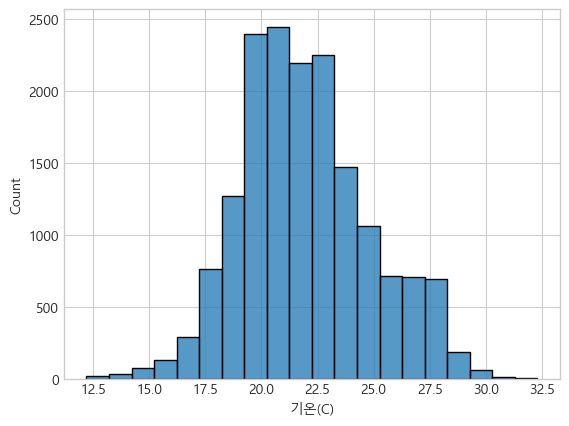

In [70]:
sns.histplot(x='기온(C)', data=df_te, bins=20)
plt.show()

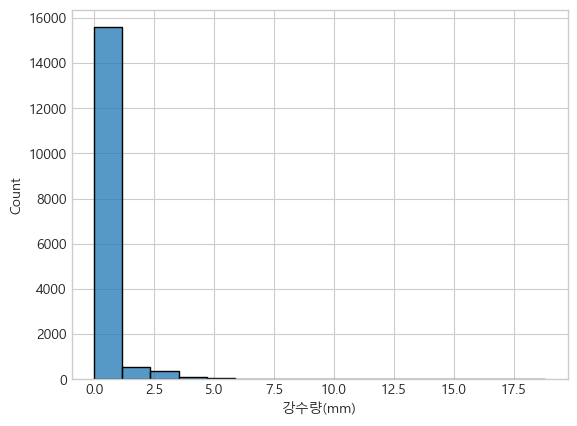

In [72]:
# 강수량
sns.histplot(x='강수량(mm)', data=df_te)
plt.show()

In [73]:
df_te.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,2022-08-25 00:00:00,23.5,0.0,2.2,72
1,1_20220825 01,1,2022-08-25 01:00:00,23.0,0.0,0.9,72
2,1_20220825 02,1,2022-08-25 02:00:00,22.7,0.0,1.5,75


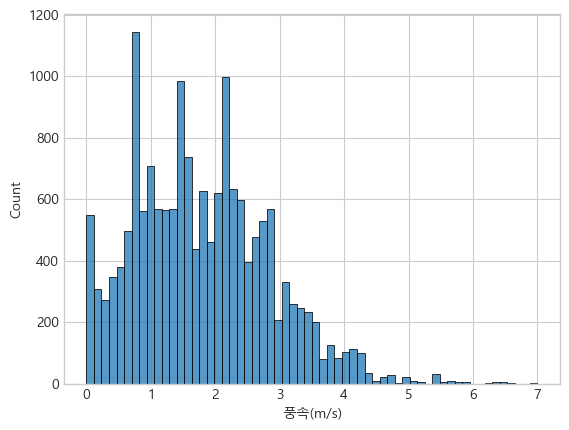

In [74]:
# 풍속
sns.histplot(x='풍속(m/s)', data=df_te)
plt.show()

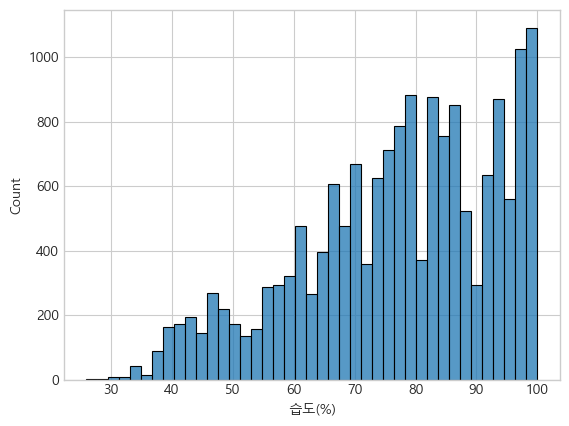

In [75]:
# 습도
sns.histplot(x='습도(%)', data=df_te)
plt.show()

### 2.2 train

In [13]:
df_tr.shape

(204000, 10)

In [14]:
# 결측치
df_tr.isnull().sum().to_frame('nan_cnt')

,nan_cnt
num_date_time,0
건물번호,0
일시,0
기온(C),0
강수량(mm),160069
풍속(m/s),19
습도(%),9
일조(hr),75182
일사(MJ/m2),87913
전력소비량(kWh),0


In [20]:
# 결측치 비율
((df_tr.isnull().sum() / len(df_tr)) * 100).to_frame('%')

,%
num_date_time,0.000000
건물번호,0.000000
일시,0.000000
기온(C),0.000000
강수량(mm),78.465196
풍속(m/s),0.009314
습도(%),0.004412
일조(hr),36.853922
일사(MJ/m2),43.094608
전력소비량(kWh),0.000000


In [25]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [26]:
df_tr.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000.000000,204000.000000,43931.000000,203981.000000,203991.000000,128818.000000,116087.000000,204000.000000
mean,50.500000,25.543524,2.040830,2.134031,78.716295,0.333637,1.063823,2451.036462
std,28.866141,3.779523,5.165218,1.358109,15.080108,0.401486,1.001030,2440.648858
min,1.000000,10.100000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,25.750000,23.400000,0.000000,1.200000,69.000000,0.000000,0.200000,1085.760000
50%,50.500000,25.700000,0.100000,2.000000,81.000000,0.100000,0.710000,1766.400000
75%,75.250000,28.100000,1.300000,2.800000,91.000000,0.700000,1.780000,2970.000000
max,100.000000,37.100000,92.200000,13.300000,100.000000,1.000000,3.920000,25488.400000


In [21]:
df_tr.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88


In [23]:
# 건물번호
df_tr['건물번호'].nunique()

100

In [50]:
# 데이터 분포
df_tr['건물번호'].value_counts()

1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: 건물번호, Length: 100, dtype: int64

In [51]:
2040 * 100

204000

In [44]:
# # 일시
# df_tr['날짜'] = df_tr['일시'].apply(lambda x: x.split(' ')[0]) # 날짜 컬럼 생성
# df_tr['시간'] = df_tr['일시'].apply(lambda x: x.split(' ')[1]) # 시간 컬럼 생성

# # 날짜 타입으로 변경
# df_tr['날짜'] = pd.to_datetime(df_tr['날짜'])

In [47]:
# # 날짜 최소값, 최대값
# df_tr['날짜'].min(), df_tr['날짜'].max()

(Timestamp('2022-06-01 00:00:00'), Timestamp('2022-08-24 00:00:00'))

In [49]:
# 그냥 일시를 바꾸는 게 낫겠다
df_tr['일시'] = pd.to_datetime(df_tr['일시'])

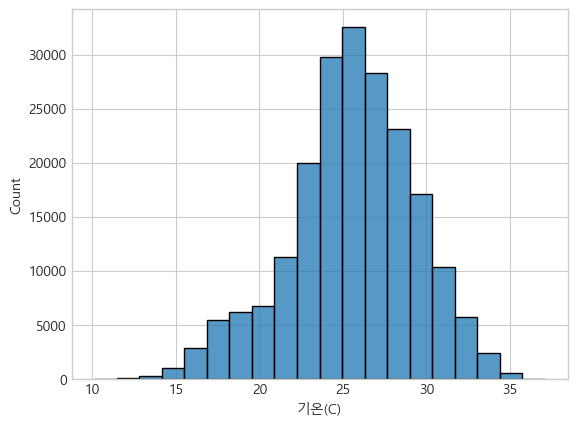

In [54]:
# 기온
sns.histplot(x='기온(C)', data=df_tr, bins=20)
plt.show()